# Imports 

In [37]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi


from sklearn.linear_model import Ridge, Lasso, LassoCV, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error


from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('../datasets/Clean_Train.csv')

# Model Experimentation

Now that we have a simple linear model working, let's try a few things different to see if we can improve. We are going to Use Poly Features and Ridge Regression to see how things turn out!

# Train Model 

## Poly Features

First we create a test and train population using test train split and creat X and for our features and target!

In [10]:
# Create X,y Variables
features = [col for col in df if col != 'SalePrice']
X = df[features]
y = df.SalePrice


# Create Test and Train Samples
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42)

Now we will create a pipeling to transform out model through PolyFeatures and Standard Scaler before fitting it to a LinearRegression estimator. 

In [35]:
linereg_pipe = Pipeline([('scale', StandardScaler()),
                         ('poly', PolynomialFeatures()),
                         ('linreg', LinearRegression())])

linereg_pipe.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('poly', PolynomialFeatures()),
                ('linreg', LinearRegression())])

In [36]:
train_score = linereg_pipe.score(X_train,y_train)
test_score = linereg_pipe.score(X_test,y_test)

print(f'''Train Score: {train_score}
Test Score: {test_score}''')

Train Score: 0.7374142701775539
Test Score: 0.755808026067705


Our new Poly Feature Model is doing better on testing information than training information! this is excellent ! Our R2 score is still a ways off from where we want it to be but our model is getting better.

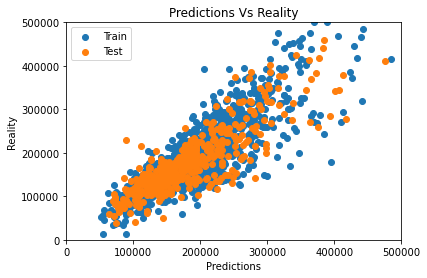

In [34]:
fig, ax = plt.subplots()
plt.scatter(linereg_pipe.predict(X_train) , y_train ,label = 'Train');
plt.scatter(linereg_pipe.predict(X_test) , y_test, label = 'Test');

plt.ylim(0,500_000)
plt.xlim(0,500_000)
plt.xlabel('Predictions')
plt.ylabel('Reality')
plt.legend()
plt.title('Predictions Vs Reality');


## Ridge Regression 

Below we experimented with Ridge Regression, but the results do not give us any reason to use this model over a simple linear one at this time. We will continue to test this model as we add new features.

In [38]:
linereg_Ridge = Pipeline([('scale', StandardScaler()),
                         ('poly', PolynomialFeatures()),
                         ('Ridge', Ridge())])

linereg_Ridge.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('poly', PolynomialFeatures()),
                ('Ridge', Ridge())])

In [41]:
ridge_train_score = linereg_Ridge.score(X_train,y_train)
ridge_test_score = linereg_Ridge.score(X_test,y_test)


print(f'''Ridge Train Score: {ridge_train_score}
Ridge Test Score: {ridge_test_score}''')

Ridge Train Score: 0.7374138413351895
Ridge Test Score: 0.7559269459731397


# Predictions

In [ ]:
# Read in the Dataframe
test_csv = pd.read_csv('../datasets/Clean_Test.csv')

In [ ]:
# select the features from our Test CSV that match the features in our model
features = [col for col in test_csv if col != 'Id']

# assign those features to test_X
test_X = test_csv[features]
        

# Scale the Test data to match or model
test_X = SS.fit_transform(test_X)

# create variable to store predictions
sub_pred = linreg.predict(test_X)

In [ ]:
# Create Dataframe of predictions and ID#
submission_predictions = pd.DataFrame(sub_pred, index = test_csv['Id'])